In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [2]:

# Load the dataset
data = pd.read_csv("kc_house_data.csv")


In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


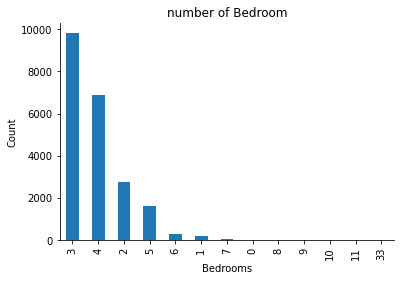

In [5]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()

<Figure size 720x720 with 0 Axes>

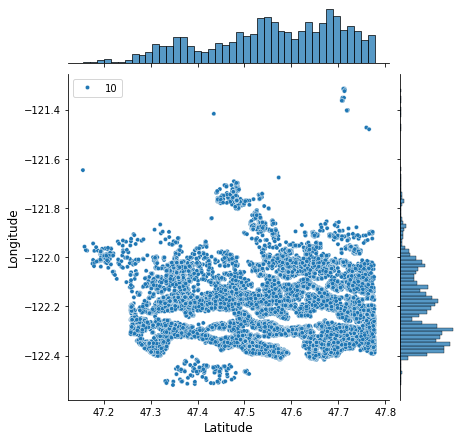

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine()

Text(0.5, 1.0, 'Price vs Square Feet')

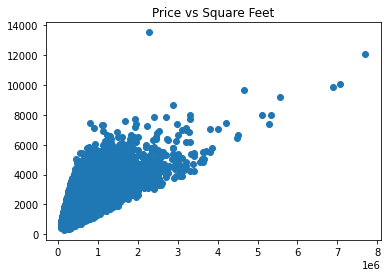

In [7]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

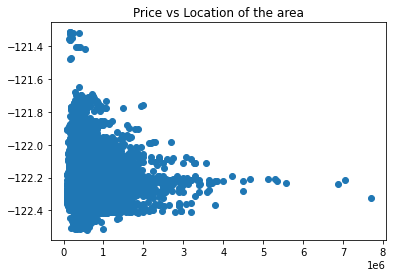

In [8]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

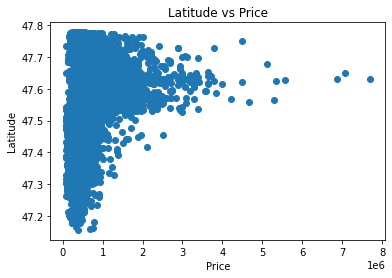

In [9]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

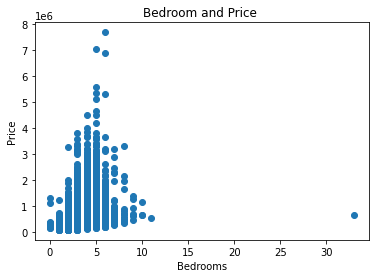

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine()

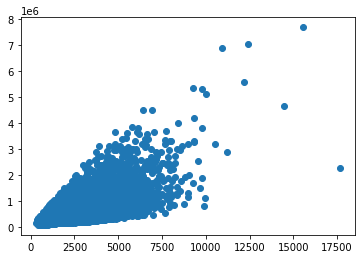

In [11]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

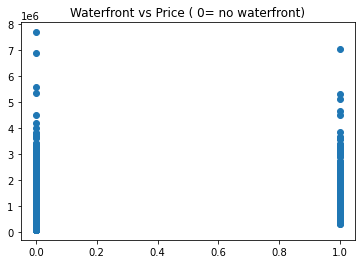

In [12]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [13]:

# Drop unnecessary columns for training
train_features = data.drop(['id', 'price'], axis=1)


In [14]:
train_features.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

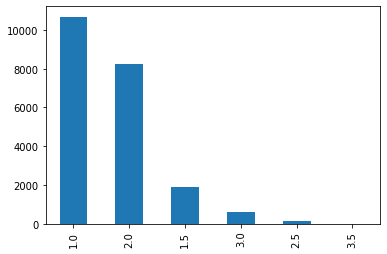

In [15]:
data.floors.value_counts().plot(kind='bar')

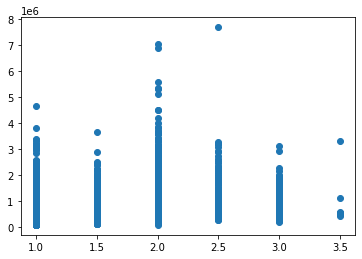

In [16]:
plt.scatter(data.floors,data.price)

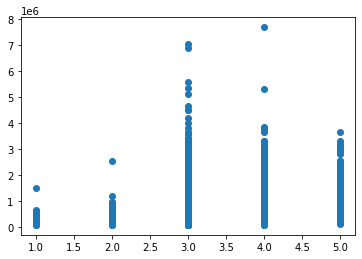

In [17]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

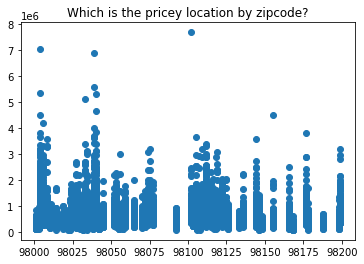

In [18]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

In [19]:
labels = data['price']
data['date'] = [1 if values == 2014 else 0 for values in data.date ]
train_features = data.drop(['id', 'price'],axis=1)

In [20]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_features, labels, test_size=0.10, random_state=2)


In [21]:

# Train a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_score = linear_reg.score(x_test, y_test)
print(f"Linear Regression Score: {linear_reg_score}")


Linear Regression Score: 0.7320342760357734


In [22]:

# Train an XGBoost regressor model 
xgboost_reg = XGBRegressor(
    n_estimators=400, max_depth=5, learning_rate=0.1, objective='reg:squarederror'
)
xgboost_reg.fit(x_train, y_train)
xgboost_reg_score = xgboost_reg.score(x_test, y_test)
print(f"XGBoost Regressor Score: {xgboost_reg_score}")


XGBoost Regressor Score: 0.9137990584399759


In [23]:

# Use PCA to transform features and predict prices
pca = PCA()
pca.fit_transform(scale(train_features))
new_data = data.drop(['id', 'price'], axis=1)
predictions = xgboost_reg.predict(new_data)

In [24]:

# Display the predicted prices
predicted_prices = pd.DataFrame({'Predicted_Price': predictions})
print(predicted_prices)

       Predicted_Price
0         231935.75000
1         490157.62500
2         213172.96875
3         512321.25000
4         487308.15625
...                ...
21608     397232.68750
21609     444888.50000
21610     354130.28125
21611     444589.00000
21612     339500.78125

[21613 rows x 1 columns]
